In [1]:
from settings_load import *
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def load_edgelist_csv(csv_name: str) -> pd.DataFrame:
    """
    Load user, count dataframe from csv
    :type csv_name: str
    """
    path = os.path.join(settings.GRAPHS_DIR, csv_name)
    dataframe = pd.read_csv(path, header=0)
    dataframe["i"] = dataframe["i"].astype("string")
    dataframe["j"] = dataframe["j"].astype("string")
    return dataframe

In [3]:
def load_vertexlist_csv(csv_name: str) -> pd.DataFrame:
    """
    Load user, count dataframe from csv
    :type csv_name: str
    """
    path = os.path.join(settings.GRAPHS_DIR, csv_name)
    dataframe = pd.read_csv(path, header=0)
    dataframe["i"] = dataframe["i"].astype("string")
    return dataframe

In [4]:
def plot_column_hist(df:pd.DataFrame, list_type:str, col:str, year:str, topn:str):
    fig, ax = plt.subplots(figsize=(16, 9))

    plt.title(f"{list_type} list {col} for the top {topn} subreddits from {year}")
    plt.xlabel(col)
    plt.ylabel('Number of subreddits n')

    df[col].hist(ax=ax, log=True, bins=100, grid=False, color='#FA5732')
    
    plt.savefig(os.path.join(settings.FIGURES_DIR, f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.{list_type}~{col}.pdf"), bbox_inches='tight')
    

# Settings

In [5]:
year = "2005-2019"
topn = "10000"

# Edge list Data Frame

In [6]:
edge_df = load_edgelist_csv(f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.edge.csv")
edge_df

,i,j,U_ij,degree_i,degree_j,weighted-degree_i,weighted-degree_j,avg-weighted-edge-weight_i,avg-weighted-edge-weight_j,W_ij
0,PewdiepieSubmissions,memes,374674,9998,9998,34897630.0,79907269.0,3490.461092,7992.325365,6.527143e-03
1,dating_advice,medical,3830,9998,9998,15595055.0,4830912.0,1559.817463,483.187838,3.750128e-04
2,dating_advice,AskDocs,12379,9998,9998,15595055.0,14715081.0,1559.817463,1471.802460,8.168225e-04
3,dating_advice,valkyrie_en,90,9998,9983,15595055.0,411429.0,1559.817463,41.212962,1.124544e-05
4,dating_advice,headphones,4547,9998,9998,15595055.0,14356181.0,1559.817463,1435.905281,3.036269e-04
...,...,...,...,...,...,...,...,...,...,...
49966780,FIFACoins,WalgreensStores,1,9045,9990,283217.0,337543.0,31.311996,33.788088,3.221857e-06
49966781,IsaacArthur,poketradereferences,1,9989,9786,592296.0,842327.0,59.294824,86.074699,1.394094e-06
49966782,illnessfakers,codbo,1,9989,9647,798939.0,799820.0,79.981880,82.908676,1.250970e-06
49966783,SteamGameSwap,DadsAndBoys,1,9995,9973,6943646.0,339894.0,694.711956,34.081420,2.745918e-07


## Edge list column plots

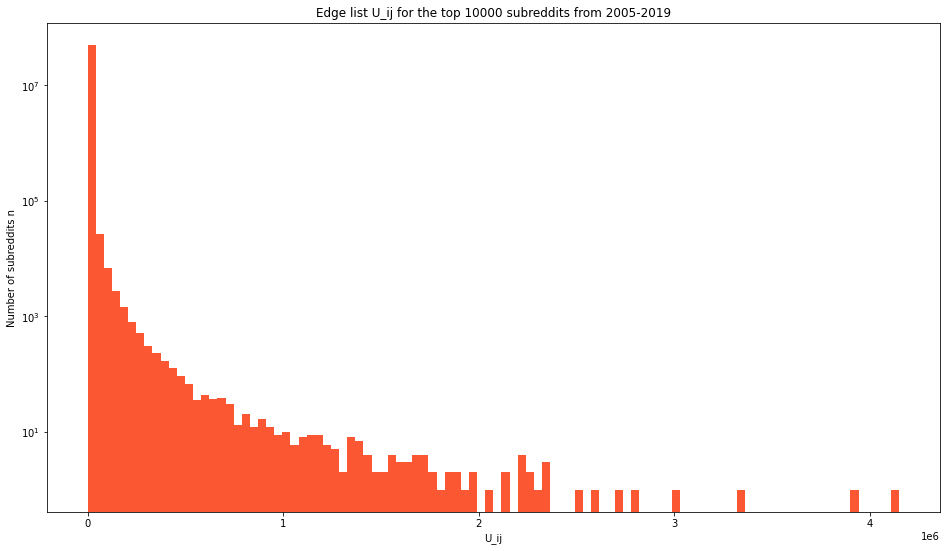

In [17]:
plot_column_hist(edge_df, "Edge", "U_ij", year, topn)

Uij. User in beiden subreddits. Zeigt wenige wichtige Kanten.

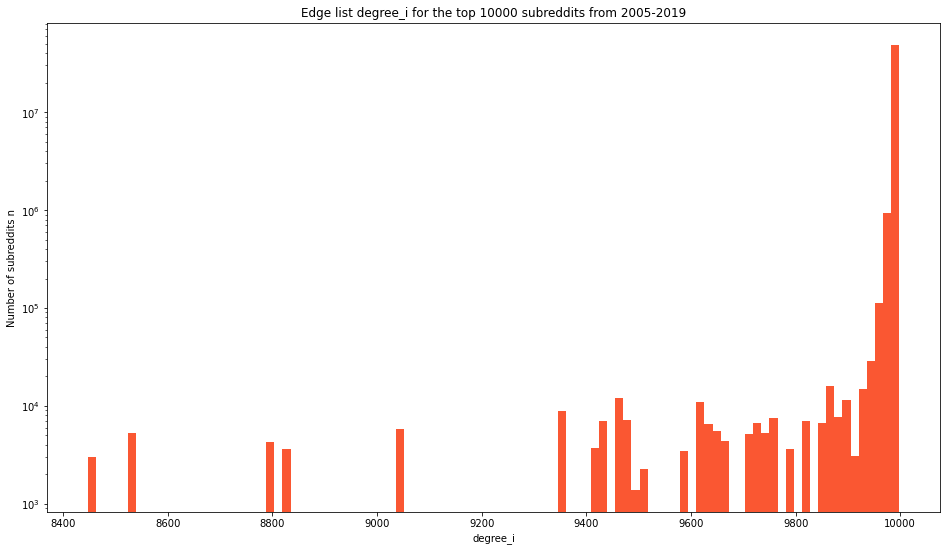

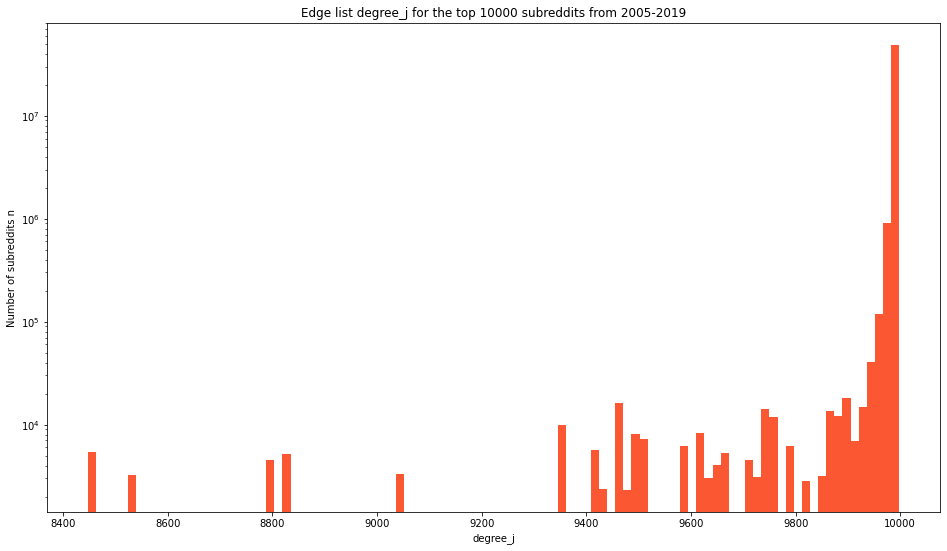

In [18]:
plot_column_hist(edge_df, "Edge", "degree_i", year, topn)
plot_column_hist(edge_df, "Edge", "degree_j", year, topn)


Viele subreddits sind "hyperconnected", linke hälfte zeigt die subreddits die stärker isoliert sind. (X achse nicht von 0-1)

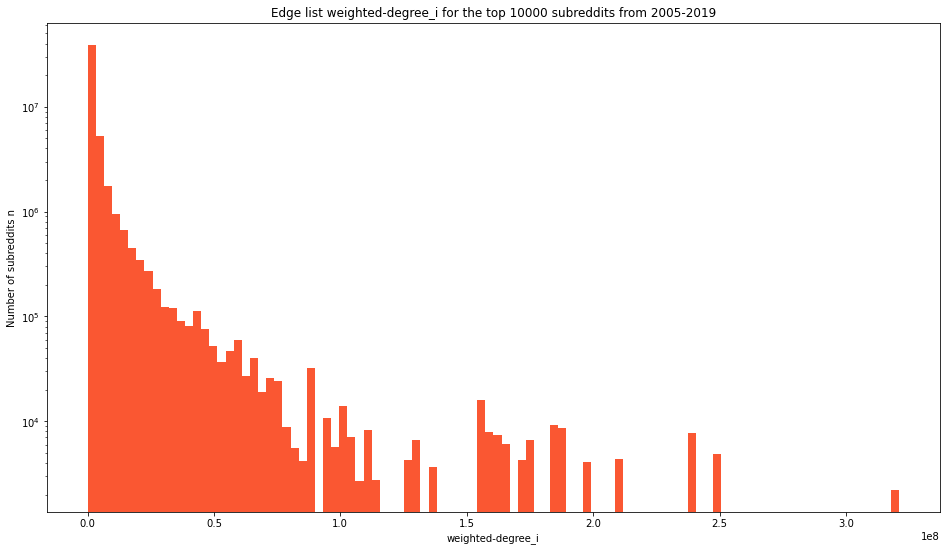

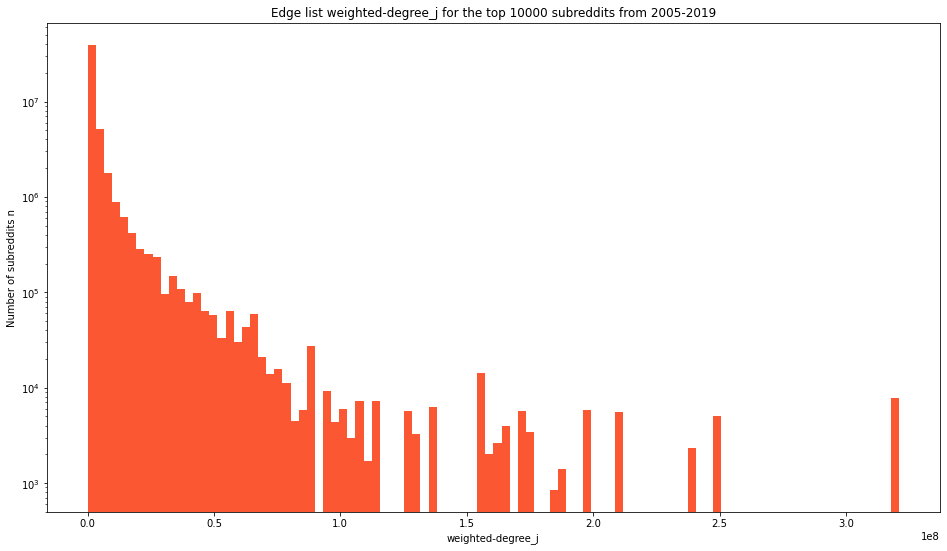

In [15]:
plot_column_hist(edge_df, "Edge", "weighted-degree_i", year, topn)
plot_column_hist(edge_df, "Edge", "weighted-degree_j", year, topn)

Rechte hälfte eher: Freunde, Verbündete, Gleiche, Nahestehende.

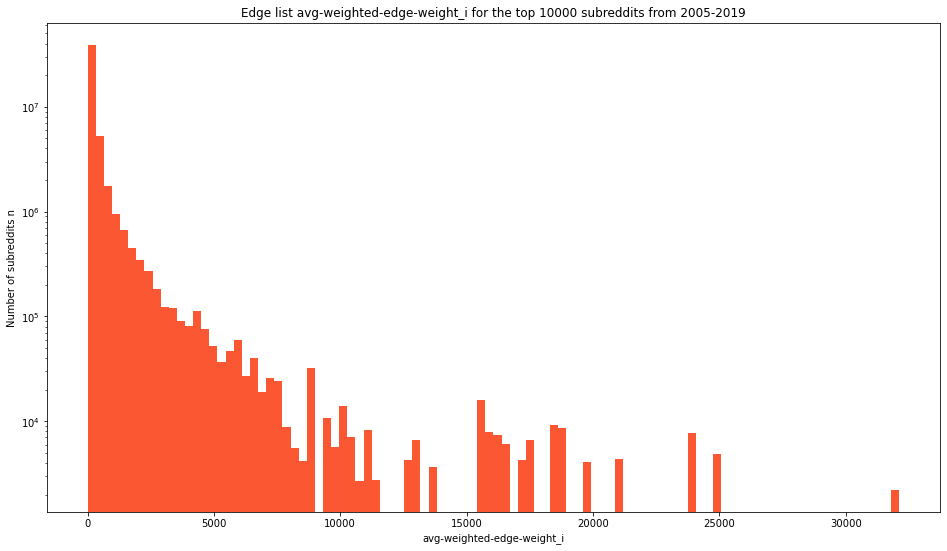

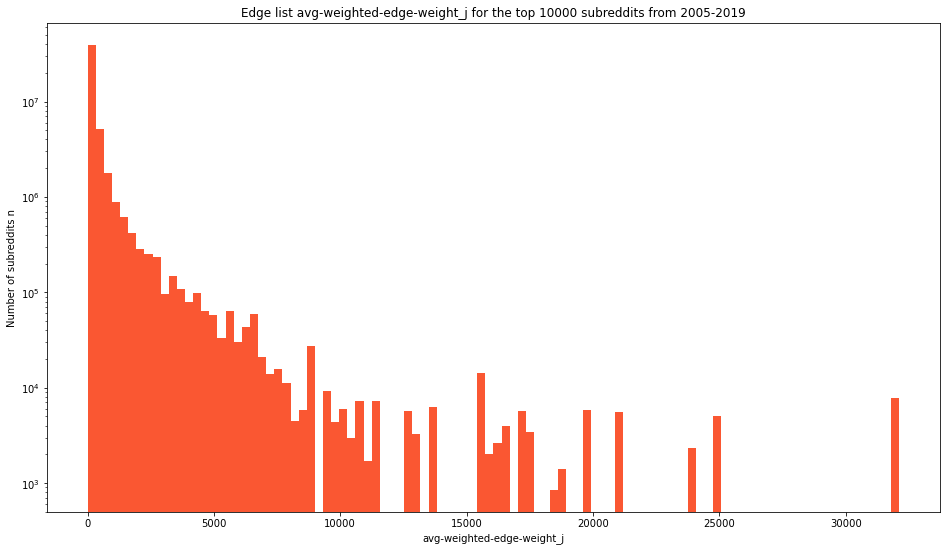

In [16]:
plot_column_hist(edge_df, "Edge", "avg-weighted-edge-weight_i", year, topn)
plot_column_hist(edge_df, "Edge", "avg-weighted-edge-weight_j", year, topn)

In [ ]:
plot_column_hist(edge_df, "Edge", "W_ij", year, topn)

# Vertex list data frame

In [9]:
vertex_df = load_vertexlist_csv(f"sr-user_{year}_filteredby_UsersInSubreddits_{year}~top-{topn}.vertex.csv")
vertex_df

,i,Ui,degree,weighted-degree,degree-degree,weighted-degree-degree,local-clustering-coefficient
0,tf2,18944762,9998,1894.855171,99923572,5331.726956,0.999635
1,SCP,9792195,9998,979.415383,99923572,5331.916285,0.999635
2,CrazyIdeas,29456805,9998,2946.269754,99923572,5331.628291,0.999635
3,jailbreakdevelopers,364021,9996,36.416667,99905264,5332.201299,0.999669
4,LinusTechTips,2437998,9998,243.848570,99923572,5332.261336,0.999635
...,...,...,...,...,...,...,...
9994,tdi,891744,9998,89.192238,99923572,5332.412015,0.999635
9995,CK2GameOfthrones,1491944,9998,149.224245,99923572,5332.316198,0.999635
9996,Supernatural,4651567,9998,465.249750,99923572,5332.107139,0.999635
9997,delhi,543846,9995,54.411806,99894894,5331.807591,0.999662


## Vertex list column plots

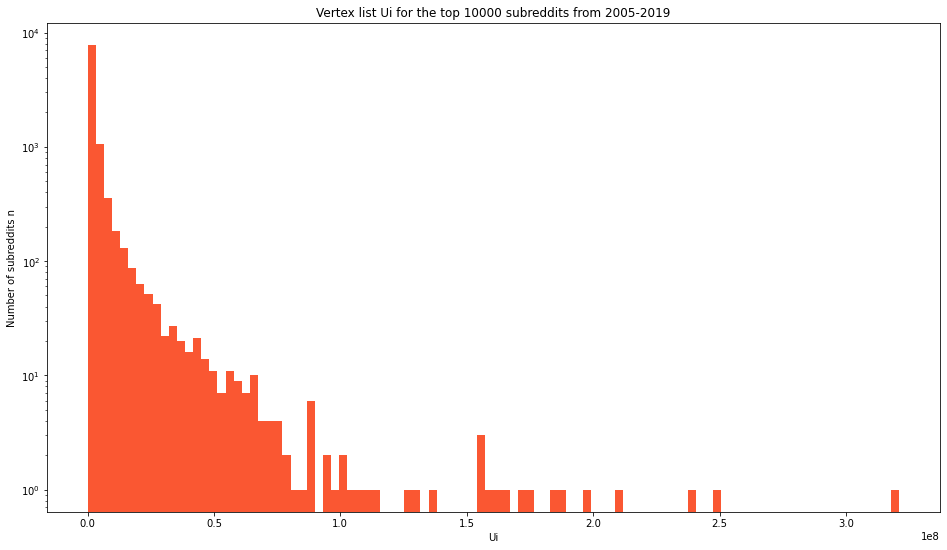

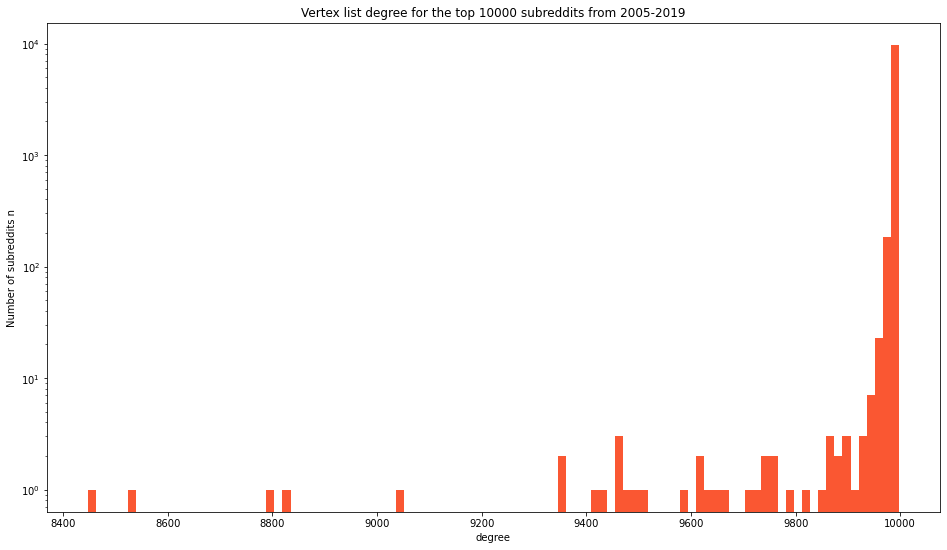

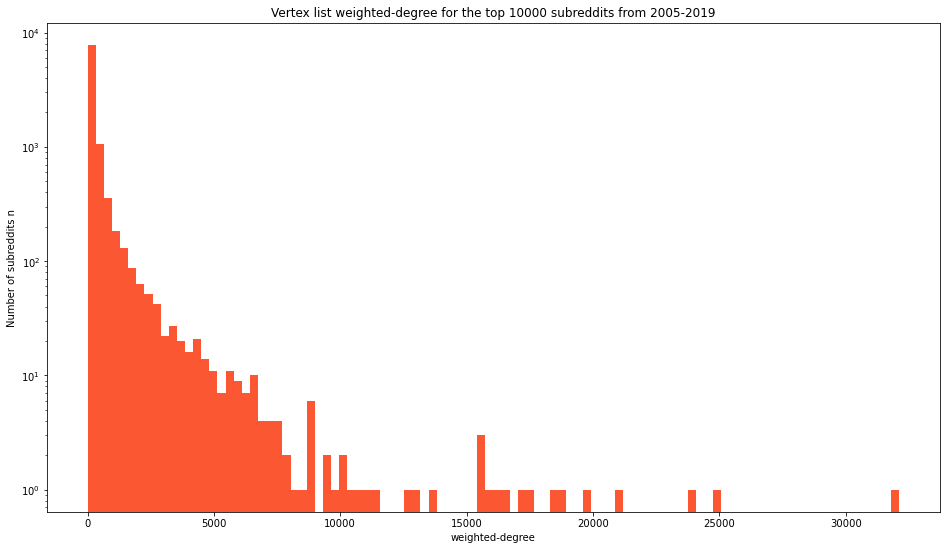

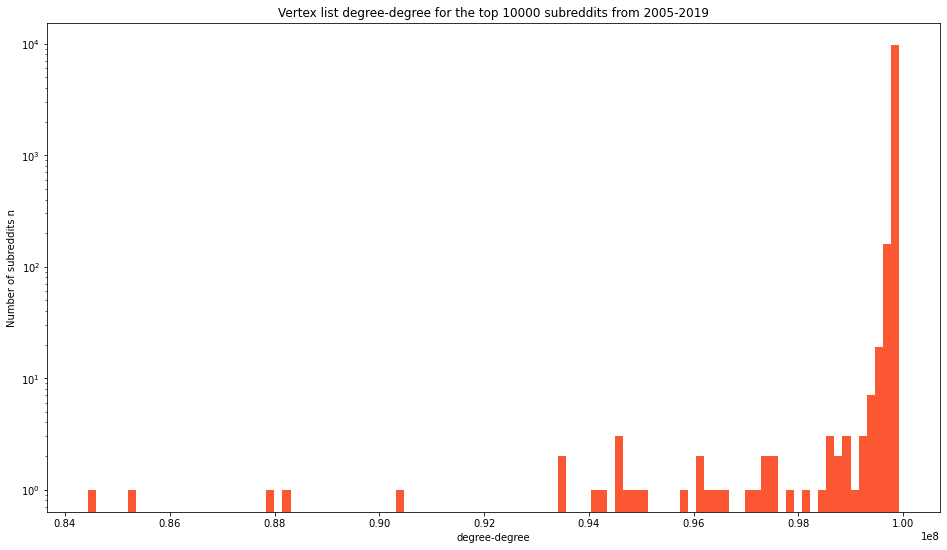

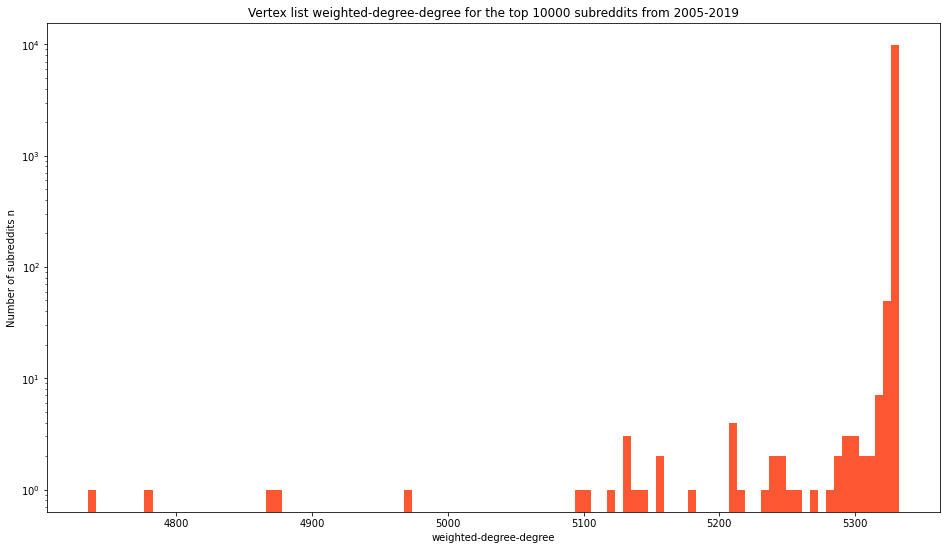

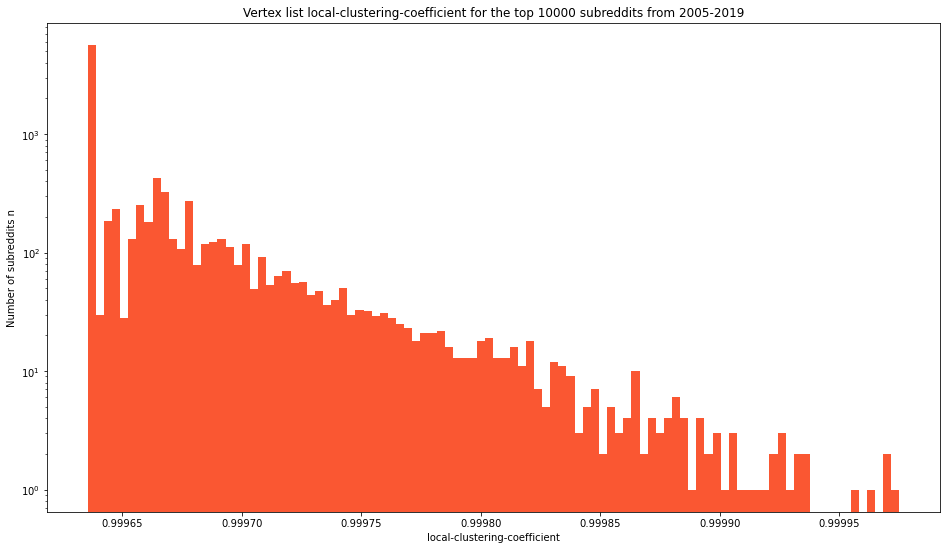

In [12]:
plot_column_hist(vertex_df, "Vertex", "Ui", year, topn)
plot_column_hist(vertex_df, "Vertex", "degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "weighted-degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "degree-degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "weighted-degree-degree", year, topn)
plot_column_hist(vertex_df, "Vertex", "local-clustering-coefficient", year, topn)